# Проект

## Регрессия

С 1 октября 2022 года отменяется НДС на бриллианты, что делает их новым инвестиционным инструментом. Давайте создадим для них модель ценообразования.

Загрузите набор данных Diamonds.csv.

Он одержит характеристики бриллиантов и их цены.

**Описание признаков**

* fluor - флуоресценция (свойство камня светиться под ультрафиолетом)
* symmetry - индикатор симметрии
* platform - название платформы, на которой был установлен драгоценный камень
* shape - фигура
* color - цвет
* clarity - прозрачность
* cut - качество огранки (может быть только для круглых камней)
* polish - полировка
* id - номер драгоценного камня
* date - дата
* price - цена
* carat - количество каратов
* tablepercent - size of the table compared to the width (не получается нормально перевести на русский)
* price_per_carat - цена за карат
* z - длина (диаметр)
* x - ширина
* depth_perc - соотношение высоты и ширины
* y - высота

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diamonds data.csv')

Необходимо спрогнозировать `price_per_carat`

In [ ]:
df.head()

,Unnamed: 0,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,135269,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
1,48477,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
2,236786,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
3,235781,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
4,277744,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228


In [ ]:
df = df.drop("Unnamed: 0", axis = 1) # удаляем мусорный столбец
df.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,F,SI1,NaN,EX,13870838,202206,12850.0,1.55,8290.32,10.29,6.41,62.0,3.97420
1,MED,EX,jamesallen,RD,H,VVS2,EX,EX,11725253,202207,7510.0,1.02,7362.75,6.41,6.45,62.5,4.03125
2,NONE,EX,jamesallen,EM,H,IF,NaN,EX,14444347,202205,21220.0,2.01,10557.21,8.60,6.37,65.0,4.14050
3,NONE,EX,jamesallen,RD,E,VS2,EX,EX,14438434,202207,8660.0,1.00,8660.00,6.39,6.44,61.4,3.95416
4,NONE,VG,jamesallen,RD,F,VS1,VG,EX,14615276,202206,8480.0,1.00,8480.00,6.28,6.36,62.3,3.96228


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,222222.0,1.358831e+07,2.548511e+06,0.0,1.359865e+07,1.440046e+07,1.483763e+07,1.541851e+07
date,222222.0,2.022024e+05,8.578826e+02,0.0,2.022050e+05,2.022060e+05,2.022070e+05,2.022070e+05
price,222222.0,1.171520e+04,2.540339e+04,0.0,4.210000e+03,6.560000e+03,1.160000e+04,2.380380e+06
carat,222222.0,1.342990e+00,7.240634e-01,0.0,1.000000e+00,1.010000e+00,1.500000e+00,2.117000e+01
price_per_carat,222222.0,7.034909e+03,5.216447e+03,0.0,4.148510e+03,5.851490e+03,8.609270e+03,9.550000e+05
z,222222.0,7.083479e+00,1.377311e+00,0.0,6.260000e+00,6.530000e+00,7.660000e+00,2.188000e+01
x,222222.0,6.423990e+00,1.046289e+00,0.0,5.690000e+00,6.380000e+00,6.820000e+00,1.805000e+01
depth_perc,222222.0,6.408683e+01,4.200656e+00,0.0,6.180000e+01,6.300000e+01,6.600000e+01,7.800000e+01
y,222222.0,4.097854e+00,5.993852e-01,0.0,3.811500e+00,3.998400e+00,4.322500e+00,1.073975e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222222 entries, 0 to 222221
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            222207 non-null  object 
 1   symmetry         222218 non-null  object 
 2   platform         222218 non-null  object 
 3   shape            222218 non-null  object 
 4   color            222218 non-null  object 
 5   clarity          222218 non-null  object 
 6   cut              148981 non-null  object 
 7   polish           222218 non-null  object 
 8   id               222222 non-null  int64  
 9   date             222222 non-null  int64  
 10  price            222222 non-null  float64
 11  carat            222222 non-null  float64
 12  price_per_carat  222222 non-null  float64
 13  z                222222 non-null  float64
 14  x                222222 non-null  float64
 15  depth_perc       222222 non-null  float64
 16  y                222222 non-null  floa

### Задание 1: Очистка

Не все камни успевают продаться за один месяц, поэтому в таблице есть повторы. Объедините данные по одному камню: подумайте, как лучше это сделать, какую цену брать.

**Попробуйте найти аномалии:** вдруг цена на некоторые камни сильно меняется (то есть продавец сам не знает, по какой цене их продавать). Также убедитесь, что остальные параметры камня не меняются.

In [ ]:
id_stat = df.groupby(by='id')['carat'].count().to_frame() # Посчитайте статистику по кол-ву камней

# разделите выборку на две части
idx_one = id_stat[id_stat['carat'] == 1].index
idx_three = id_stat[(id_stat['carat'] == 2 ) | (id_stat['carat'] == 3)].index

df_one = df.query('id in @idx_one') # те драгоценные камни, которые встретились 1 раз
df_three = df.query('id in @idx_three') # те драгоценные камни, которые встретились 2-3 раза

stat = df_three.groupby('id')[['price', 'price_per_carat', 'carat', 'x', 'y', 'z', 'depth_perc']].agg(np.std) # Посчитайте стандартное отклонение по нескольким полям,

# подумайте где оно должно равняться 0, а где меняться в каких-то разумных пределах
stat.head()

,price,price_per_carat,carat,x,y,z,depth_perc
id,,,,,,,
19423,334.863156,318.916742,0.0,0.0,0.026835,0.0,0.404145
19449,494.974747,423.054916,0.0,0.0,0.000000,0.0,0.000000
19501,831.384388,415.692194,0.0,0.0,0.027436,0.0,0.346410
19504,0.000000,0.000000,0.0,0.0,0.014213,0.0,0.212132
19505,813.172798,404.564074,0.0,0.0,0.028602,0.0,0.353553


Физические характеристики (x, y, z, carat, depth_perc) не должны меняться у одного и того же камня.
Цена может меняться, но незначительно.

Будем счиать аномальными данные, где стандартное отклонение физических характеристик одного и того же камня отличается от 0, а стандартное отклонение от цены больше 50.

In [ ]:
# Удалите аномальные наблюдения
filter_cond = ((stat['depth_perc'] > 0) | (stat['price'] > 50)  | (stat['z'] > 0) | (stat['carat'] > 0))
idx_anomaly = stat[filter_cond].index

df_three = df_three.query('id in @idx_anomaly').sort_values(by=['id','date'])

df_three = df_three.groupby('id').agg('last').reset_index() # теперь в качестве цены возьмем последнее значение по времени

df = pd.concat([df_one, df_three]).reset_index(drop=True) # соединяем результаты
df.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9120.0,1.51,6039.74,10.67,6.23,59.0,3.67570
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1390.0,0.91,1527.47,6.30,4.58,71.0,3.25180
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.0,2.27,7044.05,11.66,7.26,62.2,4.51572
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3700.0,1.01,3663.37,6.37,6.42,62.0,3.98040
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7170.0,1.00,7170.00,6.30,6.35,63.7,4.04495


Цены на бриллианты достаточно сильно меняются, попробуйте вычислить коэффициент инфляции и привести цены к последнему месяцу. Стоит учесть, что цены на все бриллианты не изменяются синхронно, то есть изменение в определенных группах может быть разным.

*Определите эти группы и рассчитайте коэффициенты инфляции для каждой из них. Подправьте цены на эти коэффициенты и создайте новую переменную.*

Бриллианты можно разделить на группы в зависимости от популярности на рынке.
Очень большие камни необычного цвета (коллекционные) покупают редко из-за высокой цены и малого их количества в продаже.
Камни очень маленькой каратности, несимметричные, мутные (почти брак) тоже не пользуются относительно большим спросом.
Отследивать инфляцию удобнее на камнях, значимых для ювелирного рынка (таких, что вставляют в ювелирные изделия для массовых продаж).

В качестве признаков группы ювелирных камней возьмем значимые характеристики: color - цвет, clarity - прозрачность, carat - количество каратов.


In [ ]:
categories = ['carat', 'color', 'clarity']
df_index = df.groupby(['date'] + categories)[['price_per_carat']]\
             .mean()\
             .reset_index() # индекс цен

date_max = df_index.date.max()


df_index = df_index.merge(
  df_index
    .query('date == @date_max')[categories + ['price_per_carat']]
    .rename(
        columns={'price_per_carat': 'latest_price_per_carat'}
    ),
  on=categories,
  how='outer'
) # сопоставление групп с максимальной датой

df_index['inflation'] = df_index['latest_price_per_carat'] / df_index.price_per_carat # расчет инфляции

df_with_inf = df.merge(df_index[['date'] + categories + ['inflation']], on=['date'] + categories, how='left') # объединить все в одну таблицу
df_with_inf['price'] = df_with_inf['price'] * df_with_inf['inflation'] # обновить цену с учетом коэффициента инфляции
df_with_inf['price_per_carat'] = df_with_inf['price'] / df_with_inf['carat'] # пересчитать цену за карат с учетом новой цены
df_with_inf.head()

,fluor,symmetry,platform,shape,color,clarity,cut,polish,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation
0,NONE,EX,jamesallen,PS,D,SI2,NaN,EX,14224443,202205,9004.437659,1.51,5963.203748,10.67,6.23,59.0,3.67570,0.987329
1,NONE,VG,jamesallen,EM,K,SI2,NaN,VG,12902293,202205,1246.775305,0.91,1370.082753,6.30,4.58,71.0,3.25180,0.896961
2,NONE,VG,jamesallen,PS,J,VS1,NaN,VG,12771762,202207,15990.000000,2.27,7044.052863,11.66,7.26,62.2,4.51572,1.000000
3,MED,EX,jamesallen,RD,J,SI2,EX,EX,14584509,202205,3876.969791,1.01,3838.583951,6.37,6.42,62.0,3.98040,1.047830
4,NONE,EX,jamesallen,RD,G,SI1,EX,EX,14773748,202206,7588.131306,1.00,7588.131306,6.30,6.35,63.7,4.04495,1.058317


In [ ]:
df = df_with_inf # далее будем пользоваться обновленными данными по ценам с учетом коэффициента инфляции

In [ ]:
df.describe()

,id,date,price,carat,price_per_carat,z,x,depth_perc,y,inflation
count,1.556070e+05,155607.000000,1.516250e+05,155607.000000,151625.000000,155607.000000,155607.000000,155607.000000,155607.000000,151625.000000
mean,1.373823e+07,202206.223171,1.106144e+04,1.342845,7137.849839,7.094117,6.437342,64.084550,4.106641,1.035818
std,2.415005e+06,0.808761,2.018360e+04,0.682587,5032.881048,1.350838,1.027961,4.151894,0.588603,0.102159
min,1.942300e+04,202205.000000,9.200000e+02,0.810000,1071.415080,4.520000,3.920000,46.000000,2.556000,0.197248
25%,1.374758e+07,202206.000000,4.422415e+03,1.000000,4343.137255,6.270000,5.710000,61.800000,3.822610,1.000000
50%,1.447563e+07,202206.000000,6.900000e+03,1.020000,6099.937086,6.560000,6.390000,62.900000,4.000860,1.000000
75%,1.490675e+07,202207.000000,1.183000e+04,1.510000,8808.441267,7.690000,6.850000,66.000000,4.353300,1.058323
max,1.541851e+07,202207.000000,2.380380e+06,21.170000,955000.000000,21.880000,18.050000,78.000000,10.739750,8.875103


Таким образом мы избавились записей, содержащих не валидные данные. Изначально датасет хранил записи, содержащие значение 0 в следующих столбцах – date, price, carat, price_per_carat, z, x, depth_perc, y, данное значение считается не допустимым.

### Task 2: Модели

Определите функцию потерь (MSE или MAE) и обоснуйте свой выбор. Постарайтесь установить базовый уровень (baseline). Используйте LabelEncoder для категориальных функций и **создайте линейную модель.**

Mean Absolute Error (MAE). Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением.

Mean Squared Error (MSE)
Измеряет среднюю сумму квадратной разности между фактическим значением и прогнозируемым значением для всех точек данных. Выполняется возведение во вторую степень, поэтому отрицательные значения не компенсируют положительными.

MSE (средняя квадратическая ошибка) — это оценка среднего значения квадрата ошибок, различие между предсказанием и фактическим значением. Эту метрику удобно использовать для выявления аномалий.
MAE (средняя абсолютная ошибка) — это оценка того, насколько близки предсказания к фактическим значениями. Эта метрика менее чувствительна к выбросам и может дать общее представление о качестве модели.

Если у нас сильные аномалии в значениях, то используем MAE; если аномалий мало, можно использовать MSE.

Поскольку мы поработали с аномалиями на предыдущем шаге, то будем использовать MAE, чтобы оценить модель в общем.

In [ ]:
# Удалим записи о камнях с Null-значениями в каких-либо харакетристиках
df = df.dropna()
df.isnull().sum()

fluor              0
symmetry           0
platform           0
shape              0
color              0
clarity            0
cut                0
polish             0
id                 0
date               0
price              0
carat              0
price_per_carat    0
z                  0
x                  0
depth_perc         0
y                  0
inflation          0
dtype: int64

In [ ]:
df["platform"].unique()
df = df.drop(columns=["platform"], axis=1) # удалим константное значение
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102535 entries, 3 to 155606
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            102535 non-null  object 
 1   symmetry         102535 non-null  object 
 2   shape            102535 non-null  object 
 3   color            102535 non-null  object 
 4   clarity          102535 non-null  object 
 5   cut              102535 non-null  object 
 6   polish           102535 non-null  object 
 7   id               102535 non-null  int64  
 8   date             102535 non-null  int64  
 9   price            102535 non-null  float64
 10  carat            102535 non-null  float64
 11  price_per_carat  102535 non-null  float64
 12  z                102535 non-null  float64
 13  x                102535 non-null  float64
 14  depth_perc       102535 non-null  float64
 15  y                102535 non-null  float64
 16  inflation        102535 non-null  floa

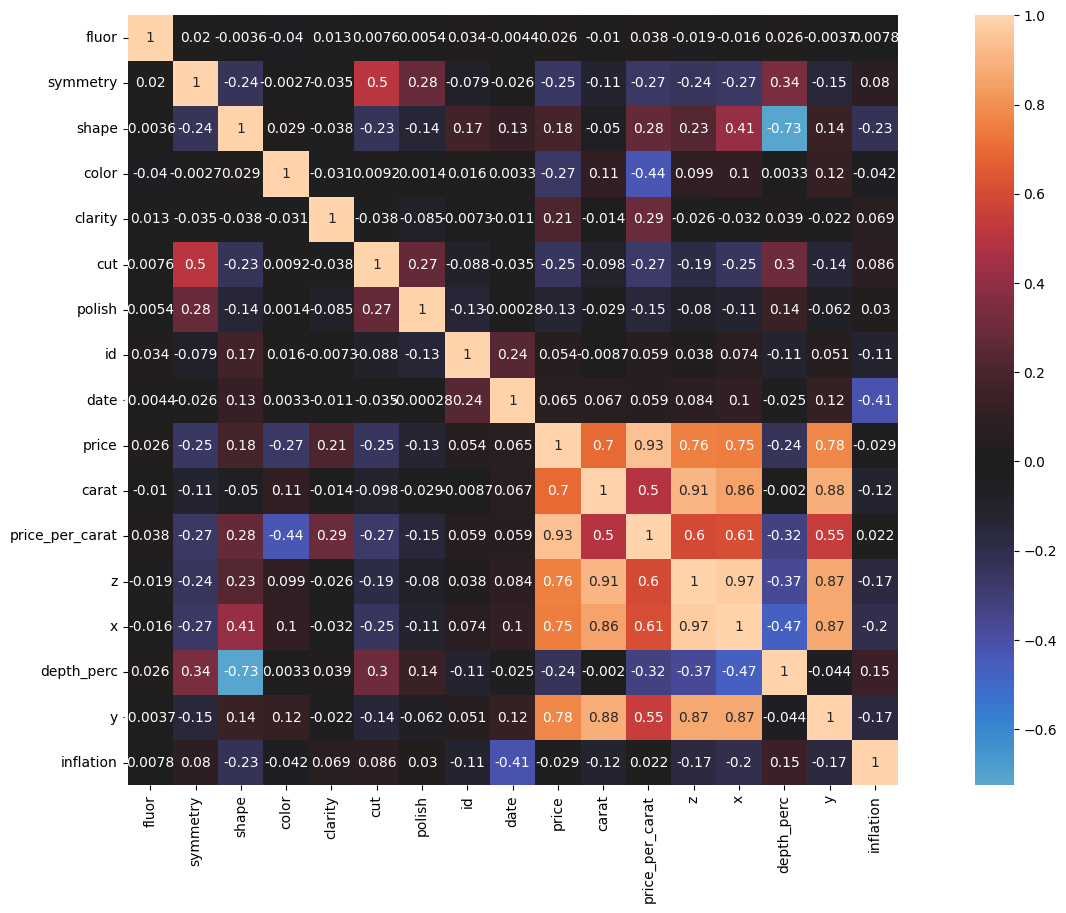

color             -0.435895
depth_perc        -0.323920
cut               -0.274435
symmetry          -0.271860
polish            -0.149504
inflation          0.021520
fluor              0.037726
date               0.058671
id                 0.059009
shape              0.277109
clarity            0.290840
carat              0.496714
y                  0.554634
z                  0.599328
x                  0.613964
price              0.934385
price_per_carat    1.000000
Name: price_per_carat, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

labelencoder = LabelEncoder()

dfLabelEncoded = df.apply(labelencoder.fit_transform)

correlation = dfLabelEncoded.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, center=0,  square=True, annot=True)
plt.show()

print(dfLabelEncoded.corr()["price_per_carat"].sort_values())

Выбираем независимые характеристики камня для предсказания цены за карат

In [ ]:
X = dfLabelEncoded[["color", "cut", "depth_perc", "clarity", "shape", "carat", "x", "y", "z"]].copy()
y = dfLabelEncoded["price_per_carat"].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102535 entries, 3 to 155606
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fluor            102535 non-null  object 
 1   symmetry         102535 non-null  object 
 2   shape            102535 non-null  object 
 3   color            102535 non-null  object 
 4   clarity          102535 non-null  object 
 5   cut              102535 non-null  object 
 6   polish           102535 non-null  object 
 7   id               102535 non-null  int64  
 8   date             102535 non-null  int64  
 9   price            102535 non-null  float64
 10  carat            102535 non-null  float64
 11  price_per_carat  102535 non-null  float64
 12  z                102535 non-null  float64
 13  x                102535 non-null  float64
 14  depth_perc       102535 non-null  float64
 15  y                102535 non-null  float64
 16  inflation        102535 non-null  floa

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

linear = LinearRegression()
linear.fit(X_train, y_train)
prices_predict = linear.predict(X_valid)

prices_mae = mean_absolute_error(prices_predict, y_valid)

print("MAE = ", prices_mae)

print("R2Score = ", r2_score(prices_predict, y_valid))

y_valid = np.array(list(y_valid))

output = pd.DataFrame({'Actual':y_valid.flatten(), 'Predicted':prices_predict.flatten()})

output.head()

MAE =  7410.416866011438
R2Score =  0.6746185997081638


,Actual,Predicted
0,18506,13580.766330
1,4132,4635.012378
2,65835,55616.458977
3,64412,62243.906641
4,67504,62946.489193


Теперь попробуйте OHE (One Hot Encoding) или TargetEncoder (сравните их).

Нормализуйте данные.

Поработайте с пропущенными значениями (обратите внимание, что для «fluor» значение может отсутствовать или значение может быть пустым).

Покажите, насколько вам удалось улучшить результат.

In [ ]:
# ! pip install category_encoders

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

dfFiltered = df[["color", "cut", "depth_perc", "clarity", "shape", "carat", "x", "y", "z"]].copy()


onehot = dfFiltered.copy()
onehot_encoder = OneHotEncoder(sparse_output=False)
obj = onehot.select_dtypes('object').columns.values.tolist()
onehot_rep = pd.DataFrame(onehot_encoder.fit_transform(onehot[obj]))
onehot_rep.columns = onehot_encoder.get_feature_names_out()
onehot_rep.index = onehot.index

onehot.drop(columns=obj, inplace=True)
onehot = pd.concat([onehot, onehot_rep], axis=1)
onehot.head()

y = df["price_per_carat"].copy().astype('int')
X = onehot.copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)

linear = LinearRegression()
linear.fit(X_train, y_train)
prices_predict = linear.predict(X_valid)

prices_mae = mean_absolute_error(prices_predict, y_valid)

print("MAE = ", prices_mae)

print("R2Score = ", r2_score(prices_predict, y_valid))

y_valid_arr = np.array(list(y_valid))

output = pd.DataFrame({'Actual':y_valid_arr.flatten(), 'Predicted':prices_predict.flatten()})

output.head()

MAE =  1239.095775430012
R2Score =  0.7151395548347801


,Actual,Predicted
0,4986,3317.093023
1,3121,2681.775049
2,16024,12013.670390
3,14659,12871.423006
4,18726,15085.536375


Сравните результаты вашей модели с результатами KNN.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors = 3)
# Обучим модель
model_knn.fit(X_train, y_train)
# Сделаем предсказание на тестовой выборке
y_pred_knn = model_knn.predict(X_valid)


print("MSE: ", mean_squared_error(y_valid, y_pred_knn))
print("MAE: ", mean_absolute_error(y_valid, y_pred_knn))
print("R2Score = ", r2_score(y_pred_knn, y_valid))

output = pd.DataFrame({'Actual':y_valid_arr.flatten(), 'Predicted':y_pred_knn.flatten()})

output.head()

MSE:  3149851.0522314874
MAE:  918.5428552851873
R2Score =  0.8194214905924256


,Actual,Predicted
0,4986,4728.000000
1,3121,3919.000000
2,16024,12764.000000
3,14659,13756.333333
4,18726,18434.333333


## Деревья решений (2 балла)

Попробуйте выполнить ту же задачу, но используя модель дерева решений.

In [ ]:
from sklearn import tree as skltree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=17)
tree_params = {"max_depth": range(1, 20), "min_samples_split": range(20, 120, 20)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, scoring = 'neg_mean_squared_error', verbose=2)

tree_grid.fit(X_train, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 95 candidates, totalling 475 fits


{'max_depth': 19, 'min_samples_split': 80}

In [ ]:
y_pred = tree_grid.predict(X_valid)

# skltree.plot_tree(tree_grid)


print("MSE: ", mean_squared_error(y_valid, y_pred))
print("MAE: ", mean_absolute_error(y_valid, y_pred))
print("R2Score = ", r2_score(y_valid, y_pred))
output = pd.DataFrame({'Actual':y_valid_arr.flatten(), 'Predicted':y_pred.flatten()})
output.head()

MSE:  3269437.1906078835
MAE:  849.7450378122086
R2Score =  0.8263357802582694


,Actual,Predicted
0,4986,4703.938776
1,3121,3549.369863
2,16024,12270.030769
3,14659,13767.800000
4,18726,18334.844156


## Ансамблевые методы (2 балла)

Попробуйте выполнить ту же задачу, но используя ансамблевые методы (модель случайного леса).

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Создадим объект класса RandomForestRegressor
forest_ = RandomForestRegressor(n_estimators=20)
forest_params = {"max_depth": range(10, 20), "min_samples_split": range(20, 120, 20)}

forest_grid = GridSearchCV(forest_, forest_params, cv=3, n_jobs=-1,  scoring = 'neg_mean_squared_error', verbose=2)

# Обучим его на обучающей части датасета при помощи метода fit
forest_grid.fit(X_train, y_train)
forest_grid.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'max_depth': 17, 'min_samples_split': 40}

In [ ]:
# Получим предсказание нашего случайного леса при помощи метода predict
y_pred = forest_grid.predict(X_valid)

# Посмотрим на наши метрики

print("MSE: ", mean_squared_error(y_valid, y_pred))
print("MAE: ", mean_absolute_error(y_valid, y_pred))
print("R2Score = ", r2_score(y_valid, y_pred))
output = pd.DataFrame({'Actual':y_valid_arr.flatten(), 'Predicted':y_pred.flatten()})
output.head()

MSE:  2715930.3870153185
MAE:  801.6779522047498
R2Score =  0.855736659236394


,Actual,Predicted
0,4986,4795.061309
1,3121,3509.686155
2,16024,12334.659806
3,14659,14096.585598
4,18726,17756.044975


## Заключение (0.5 баллов)

# Вывод:

Используя библиотеку pandas мы научились взаимодействовать с датафреймами и проводить первичный анализ данных используя методы describe.
Там же освоили фильтрацию данных с помощью запросов и добавлению новых фич в датафрейм.

Узнали о различных моделях машинного обучения, научились их обучать и считать ошибки.

Разобранные модели -
- K nearest Neighbors
  
  % desciption %

- DecisionTreeRegressor

  % description %

- RandomForestRegressor

  % description %


Поработали с признаками (нет) и научились определять подходящие (нет).

На момент написания этого вывода выглядит, что лучшей моделью является Ансамблевый метод (RandomForestRegressor) на основе того, что у него наименьший MAE, однако он же является самым медленным и лишь немного впереди KNN.




Ассистент:

Очистка: 1.8 / 2 (лучше бы было чтобы в этом разделе заполнили и пропуски и удаляли все ненужные столбцы)

Сравнения и KNN: 1 / 1.5 (не нормализованы данные, можно обрабатывать none эффективнее и с аргументацией)

ДР: 2 / 2

АМ: 2 / 2

Заключение:  0.4 / 0.5 (уместно бы было добавление причины почему деревья работают лучше - могут работать с ненормализованными данными)

Бонус: 1 / 2 (можно было чуть больше добавить визуализации)

Фидбэк: очень хороший проект, основные задачи выполнены, чтобы довести до идеала нужна практика